# AIDM7330 Basic Programming for Data Science
important:about assignment and final exam

# Introduction to matplotlib
The purpose of a plotting package is to assist the programmer visualizing data as easily as possible, with all the necessary
control, by using relatively high-level commands most of the time, and still have the ability to use the low-level commands when needed.

Therefore, everything in matplotlib is organized in a hierarchy. At the top
of the hierarchy is the matplotlib "state-machine environment" which is
provided by the `matplotlib.pyplot` module. At this level, simple
functions are used to add plot elements (lines, images, text, etc.) to
the current axes in the current figure.

The next level down in the hierarchy is the first level of the object-oriented
interface, in which pyplot is used only for a few functions such as figure
creation, and the user explicitly creates and keeps track of the figure
and axes objects. At this level, the user uses pyplot to create figures,
and through those figures, one or more axes objects can be created. These
axes objects are then used for most plotting actions.

For even more control -- which is essential for things like embedding
matplotlib plots in GUI applications -- the pyplot level may be dropped
completely, leaving a purely object-oriented approach.


## Install Matplotlib package

In [1]:
# Install required packages using pip package manager in the current Jupyter kernel
import sys
!{sys.executable} -m pip install matplotlib

In [2]:
#important command to display IMMEDIATELY your plots
%matplotlib inline

## Import libraries

In [3]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Parts of a Figure
=================

![](matplotlib_figure_parts.png)

`figure.Figure`
----------------------------------

The **whole** figure.  The figure keeps track of all the child `axes.Axes`, a smattering of
'special' artists (titles, figure legends, etc), and the **canvas**.
(Don't worry too much about the canvas, it is crucial as it is the
object that actually does the drawing to get you your plot, but as the
user it is more-or-less invisible to you).  A figure can have any
number of `axes.Axes`, but to be useful should have
at least one.

The easiest way to create a new figure is with pyplot:



In [4]:
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title

Text(0.5, 0.98, 'No axes on this figure')

<Figure size 640x480 with 0 Axes>

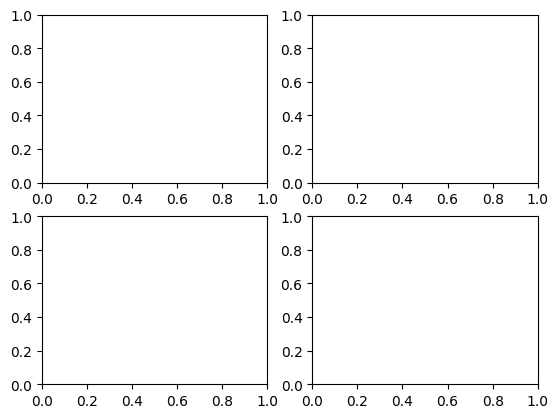

In [5]:
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

`axes.Axes`
------------------------------

This is what you think of as 'a plot', it is the region of the image
with the data space. A given figure
can contain many Axes, but a given `axes.Axes`
object can only be in one `figure.Figure`.  The
Axes contains two (or three in the case of 3D)
`axis.Axis` objects (be aware of the difference
between **Axes** and **Axis**) which take care of the data limits.
Each
`Axes` has a title, an x-label, and a y-label.
轴域


`axis.Axis`
------------------------------

These are the number-line-like objects. They take
care of setting the graph limits and generating the ticks (the marks
on the axis) and ticklabels (strings labeling the ticks).
轴

`artist.Artist`
----------------------------------

Basically everything you can see on the figure is an artist (even the
`Figure`, `Axes`, and `Axis` objects).  This
includes `Text` objects, `Line2D` objects,
`collection` objects, `Patch` objects ... (you get the
idea).  When the figure is rendered, all of the artists are drawn to
the **canvas**.  Most Artists are tied to an Axes; such an Artist
cannot be shared by multiple Axes, or moved from one to another.


Types of inputs to plotting functions
=====================================

All of plotting functions expect `np.array` or `np.ma.masked_array` as
input.  Classes that are 'array-like' such as `pandas` data objects
and `np.matrix` may or may not work as intended.  It is best to
convert these to `np.array` objects prior to plotting.

For example, to convert a `pandas.DataFrame`:


In [6]:
a = pd.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a_asarray = a.values#return a numpy array
print(a)
print(type(a))
print('---------')
print(a_asarray)
print(type(a_asarray))

          a         b         c         d         e
0  0.714430  0.453970  0.889074  0.079236  0.849539
1  0.372459  0.434447  0.853703  0.440439  0.915473
2  0.041240  0.885586  0.772657  0.002826  0.841964
3  0.292718  0.871439  0.066716  0.684271  0.083423
<class 'pandas.core.frame.DataFrame'>
---------
[[0.7144295  0.45396966 0.88907447 0.07923639 0.84953908]
 [0.37245872 0.43444704 0.85370256 0.44043948 0.91547257]
 [0.04123998 0.885586   0.77265712 0.00282555 0.84196362]
 [0.29271754 0.87143865 0.06671637 0.68427143 0.08342339]]
<class 'numpy.ndarray'>


to convert a `np.matrix`:

In [7]:
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)
print(b)
print(type(b))
print('---------')
print(b_asarray)
print(type(b_asarray))

[[1 2]
 [3 4]]
<class 'numpy.matrix'>
---------
[[1 2]
 [3 4]]
<class 'numpy.ndarray'>


Matplotlib, pyplot and pylab: how are they related?
====================================================

Matplotlib is the whole package and `matplotlib.pyplot` is a module in
Matplotlib.

For functions in the pyplot module, there is always a "current" figure and
axes (which is created automatically on request).  For example, in the
following example, the first call to ``plt.plot`` creates the axes, then
subsequent calls to ``plt.plot`` add additional lines on the same axes, and
``plt.xlabel``, ``plt.ylabel``, ``plt.title`` and ``plt.legend`` set the
axes labels and title and add a legend.


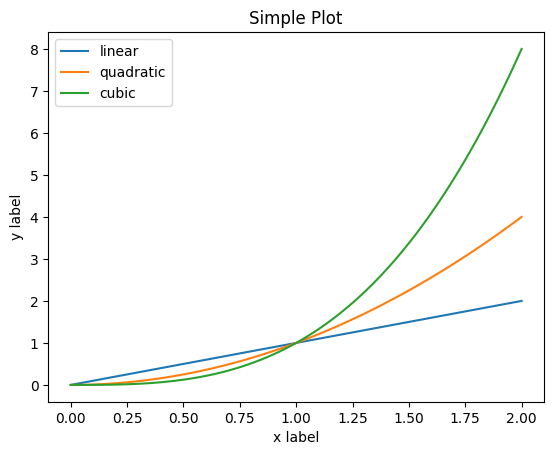

In [ ]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

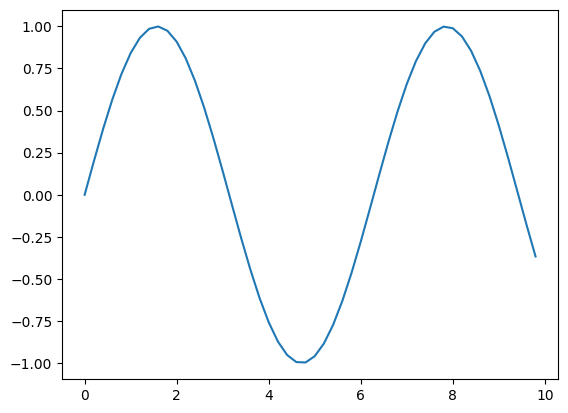

In [8]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()


# Pyplot


An introduction to the pyplot interface.


Intro to pyplot
===============

`matplotlib.pyplot` is a collection of command style functions
that make matplotlib work like MATLAB.
Each ``pyplot`` function makes
some change to a figure: e.g., creates a figure, creates a plotting area
in a figure, plots some lines in a plotting area, decorates the plot
with labels, etc.

In `matplotlib.pyplot` various states are preserved
across function calls, so that it keeps track of things like
the current figure and plotting area, and the plotting
functions are directed to the current axes (please note that "axes" here
and in most places in the documentation refers to the *axes*
`part of a figure <figure_parts>`
and not the strict mathematical term for more than one axis).

Generating visualizations with pyplot is very quick:



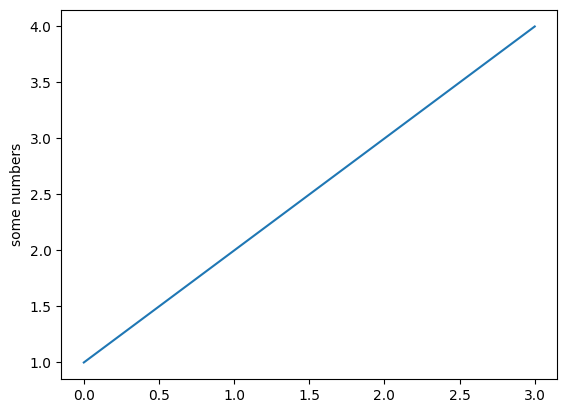

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis
from 1-4.  If you provide a single list or array to the
`pyplot.plot` command, matplotlib assumes it is a
sequence of y values, and automatically generates the x values for
you.  Since python ranges start with 0, the default x vector has the
same length as y but starts with 0.  Hence the x data are
``[0,1,2,3]``.

`pyplot.plot` is a versatile command, and will take
an arbitrary number of arguments.  For example, to plot x versus y,
you can issue the command:



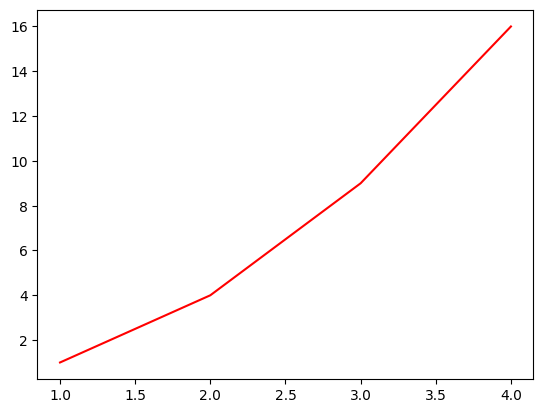

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r-')#value, value, some feature

Formatting the style of your plot
---------------------------------

For every x, y pair of arguments, there is an optional third argument
which is the format string that indicates the color and line type of
the plot.  The letters and symbols of the format string are from
MATLAB, and you concatenate a color string with a line style string.
The default format string is 'b-', which is a solid blue line.  For
example, to plot the above with red circles, you would issue



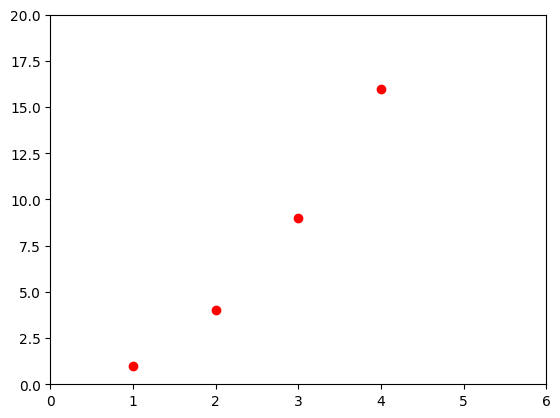

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])#x:0-6,y:0-20
plt.show()

See the `pyplot.plot` documentation for a complete
list of line styles and format strings.  The
`pyplot.axis` command in the example above takes a
list of ``[xmin, xmax, ymin, ymax]`` and specifies the viewport of the
axes.

If matplotlib were limited to working with lists, it would be fairly
useless for numeric processing.  Generally, you will use `numpy` arrays.  In fact, all sequences are
converted to numpy arrays internally.  The example below illustrates a
plotting several lines with different format styles in one command
using arrays.



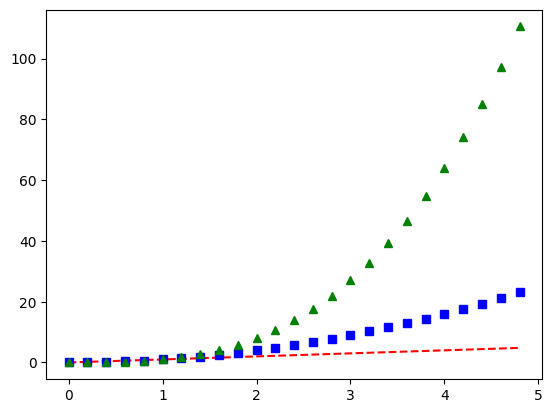

In [9]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()


Plotting with keyword strings
=============================

There are some instances where you have data in a format that lets you
access particular variables with strings. For example, with
`numpy.recarray` or :class:`pandas.DataFrame`.

Matplotlib allows you provide such an object with
the ``data`` keyword argument. If provided, then you may generate plots with
the strings corresponding to these variables.



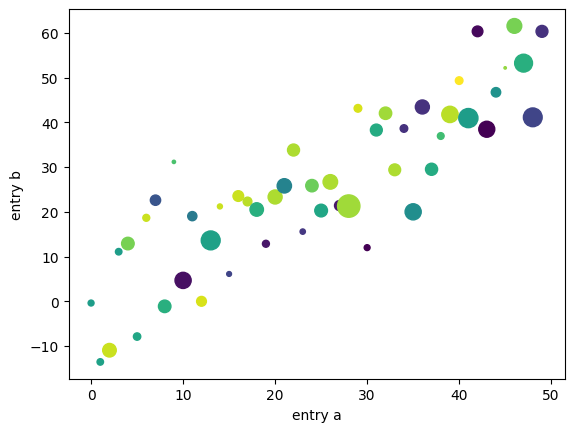

In [ ]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}#generate 50 numbers for each series
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')#3 data dimension,except x and y and ridus of point,also can append color as a dimension
plt.show()


Plotting with categorical variables
===================================

It is also possible to create a plot using categorical variables.
Matplotlib allows you to pass categorical variables directly to
many plotting functions. For example:



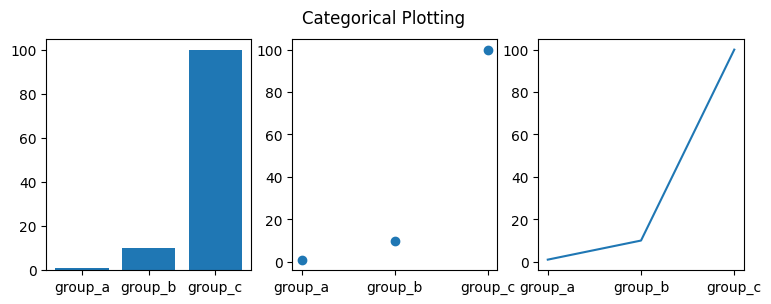

In [12]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)#the first picture of 3 pictures
plt.bar(names, values)

plt.subplot(132)
plt.scatter(names, values)

plt.subplot(133)
plt.plot(names, values)

plt.suptitle('Categorical Plotting')
plt.show()

# Matplotlib Examples

Additional elements in matplotlib

In [13]:
import matplotlib.pyplot as plt
import numpy as np

#set x values
x = np.arange(0,100)
print('----  x  ----')
print(x)
print(type(x))

#set y values
y = x*2
print('----  y  ----')
print(y)
print(type(y))

#set z values
z = x**2
print('----  z  ----')
print(z)
print(type(z))

----  x  ----
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
<class 'numpy.ndarray'>
----  y  ----
[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198]
<class 'numpy.ndarray'>
----  z  ----
[   0    1    4    9   16   25   36   49   64   81  100  121  144  169
  196  225  256  289  324  361  400  441  484  529  576  625  676  729
  784  841  900  961 1024 1089 1156 1225 1296 1369 1444

**Example 1**

Simple chart:

    1) Create a figure object
    2) Add an axis to the figure canvas, with origin equals to (0, 0) and width/height as large as the canvas
    3) Plot (x, y) on that axes and set the labels and a title (e.g., 'my first plot')

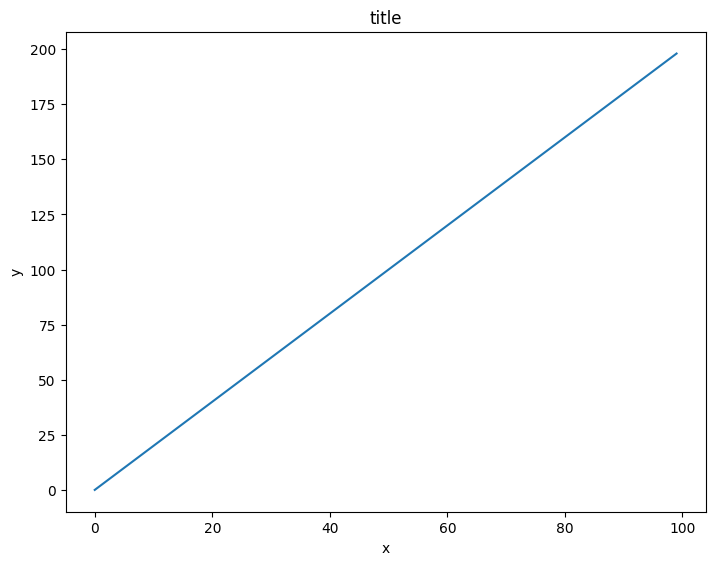

In [14]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.set_title('title')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.plot(x,y);

**Example 2**

A figure object with put two axes (ax1 and ax2) representing the plot of (x, y).

    1) ax1: origin equals (0, 0); height/width as large as the canvas
    2) ax2: origin at the middle of the canvas; height/width as large as a quarter of the canvas

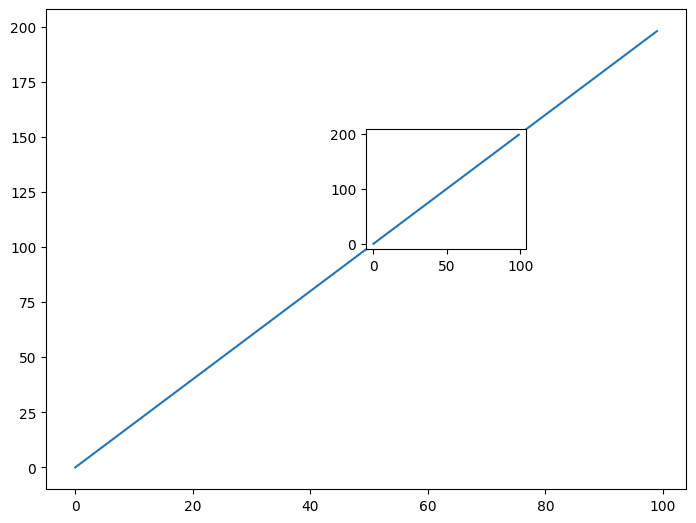

In [15]:
fig1 = plt.figure()

ax1 = fig1.add_axes([0,0,1,1])#external one
ax2 = fig1.add_axes([0.5,0.5,.25,.25])#internal one

ax1.plot(x,y)
ax2.plot(x,y)

**Example 3**

Multi chart.

    1) Create a figure object and add two axes to a figure object at [0,0,1,1] and [0.2,0.5,.4,.4]
    2) Plot (x, z) on the first axis
    3) Plot (x, y) on the second axis, and set y boundary between (30, 50), x boundary between (20, 22)

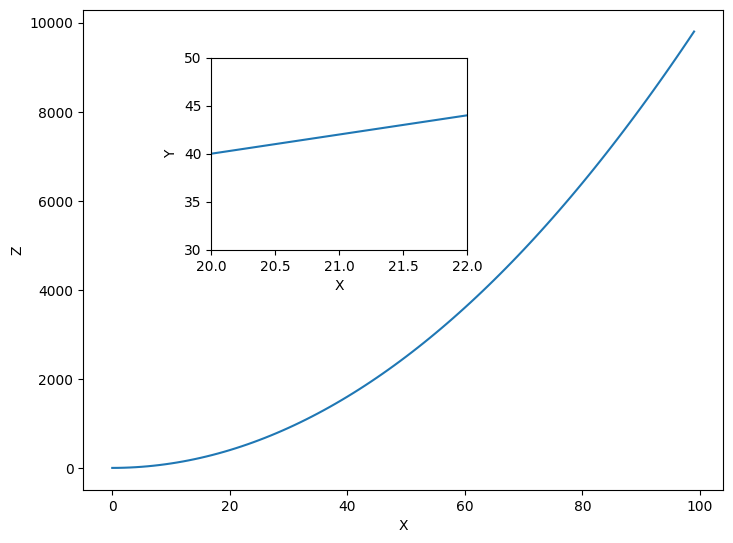

In [16]:
fig1 = plt.figure()
ax0 = fig1.add_axes([0,0,1,1])
ax1 = fig1.add_axes([0.2,0.5,.4,.4])

ax0.set_xlabel('X')
ax0.set_ylabel('Z')

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(30,50)
ax1.set_xlim(20,22)

ax0.plot(x,z)
ax1.plot(x,y);

**Example 4**

Zoom of chart.

    1) Create a figure object and add two axes to a figure object at [0,0,1,1] and [0.2,0.5,.4,.4]
    2) Plot (x, z) on the first of the axes
    3) Plot a zoom of (x, z) on the second of the axes, setting z boundary between (0, 2000), x boundary between (20, 40)

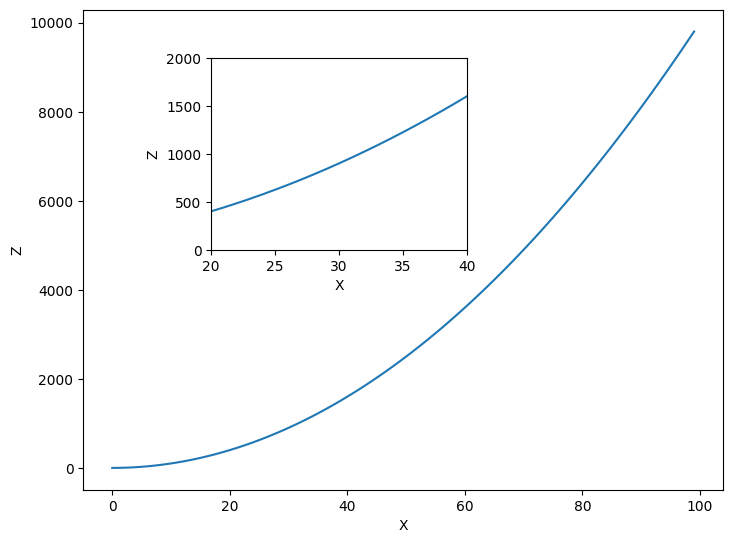

In [17]:
fig1 = plt.figure()
ax0 = fig1.add_axes([0,0,1,1])
ax1 = fig1.add_axes([0.2,0.5,.4,.4])

ax0.set_xlabel('X')
ax0.set_ylabel('Z')

ax1.set_xlabel('X')
ax1.set_ylabel('Z')
ax1.set_ylim(0,2000)
ax1.set_xlim(20,40)

ax0.plot(x,z)
ax1.plot(x,z);

**Example 5**

Sample lines.

    1) Add 2 columns of subplot to the current figure.
    2) Plot (x,y) and (x,z) on the axes, with different color, linewidth (`lw`) and style (`ls`).

|Linestyle | Description |
|:---:|:---:|
|``'-'`` or ``'solid'`` | solid line|
|``'--'`` or  ``'dashed'`` | dashed line|
|``'-.'`` or  ``'dashdot'`` | dash-dotted line|
|``':'`` or ``'dotted'`` | dotted line|
|``'None'`` or ``' '`` or ``''`` | draw nothing|

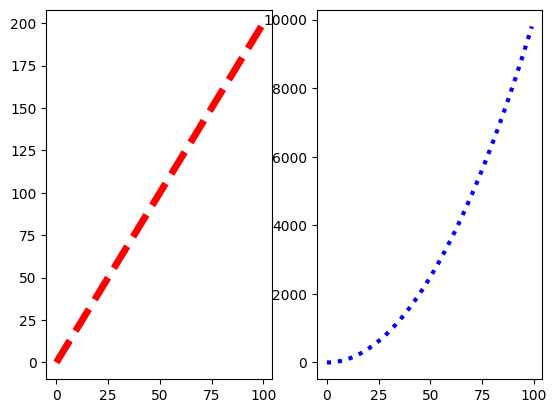

In [18]:
fig, axes = plt.subplots(nrows=1,ncols=2)

axes[0].plot(x,y, color='red', lw="5", ls='--')
axes[1].plot(x,z, color='blue',lw="3", ls='dotted');



# Seaborn

[Seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Library Reference: [LINK](https://seaborn.pydata.org/api.html)

## Install Seaborn package

In [19]:
# Install required packages using pip package manager in the current Jupyter kernel
import sys
!{sys.executable} -m pip install seaborn

## Import the library

In [20]:
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

## Data Exploration and Analysis
Recap

In [21]:
# Load the 'titanic' dataset from the Seaborn's online repository
titanic = sns.load_dataset('titanic')

In [22]:
# Seaborn loads the dataset as Pandas Dataframe
print(type(titanic))

<class 'pandas.core.frame.DataFrame'>


In [23]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
#check NA values
print(titanic.isna().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


**Example 1**

Plot of univariate distribution of the 'fare' column in titanic:
* color the bars in red
* specify the bins equal to 30.
The bins specify how to group the data.

<ipython-input-26-19a0ada3cf4f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], kde=False, color="red", bins=30); #bins and red = distplot


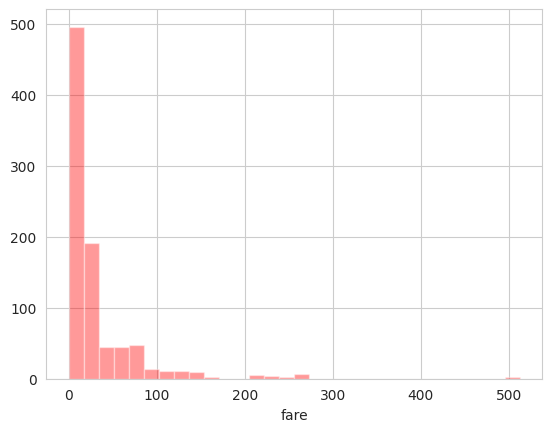

In [26]:
sns.distplot(titanic['fare'], kde=False, color="red", bins=30); #bins and red = distplot

**Example 2**

Plot the counting of males and females in the dataset

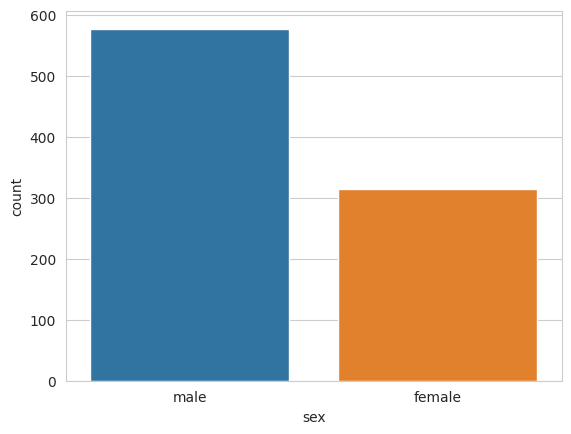

In [27]:
sns.countplot(x='sex', data=titanic);

**Example 3**

Plot the counting of the different passenger classes in the dataset

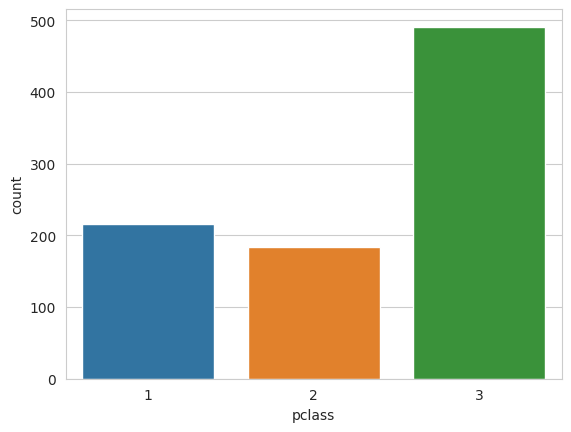

In [28]:
sns.countplot(x='pclass', data=titanic);

**Example 4**

Draw a box plot that shows distribution of 'age' with respect to 'class' categories.

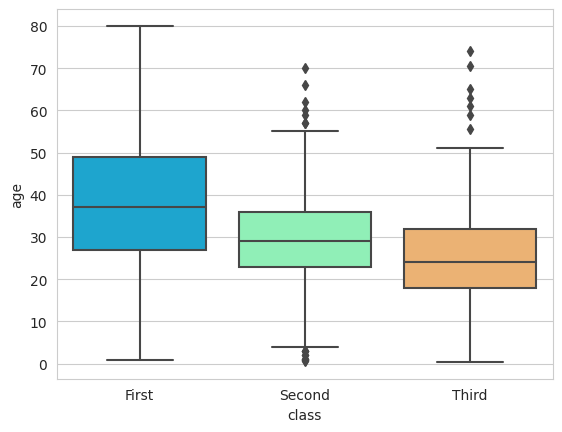

In [29]:
sns.boxplot(x="class", y="age", data=titanic, palette='rainbow');

**Example 5**

A complex chart: includes bivariate and univariate graphs, using the 'fare' column in titanic as x and 'age' column as y.

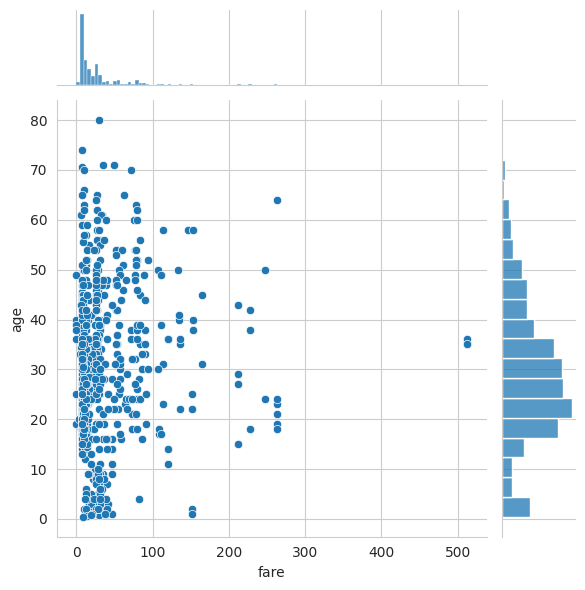

In [30]:
sns.jointplot(x='fare', y='age', data =titanic);

**Example 6**

The scatterplot with non-overlapping points of the 'age' column, categorized by the 'class' field and color the plot in 'Set2' palette.

Scatterplot is sensitive to missing data. We should apply some data cleaning strategy.

<ipython-input-31-3767a2abab4b>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x="class", y="age", data=titanicCopy, palette='Set2');


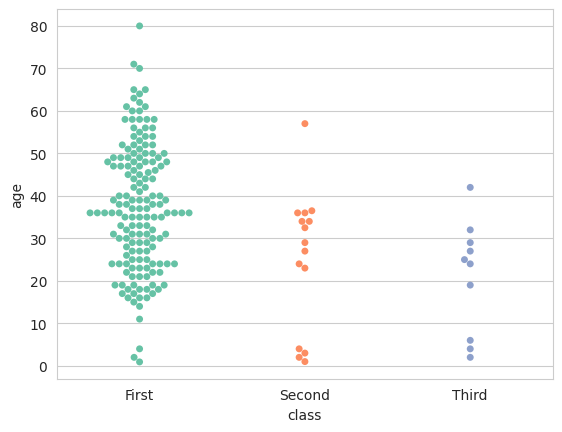

In [31]:
# Stategy: delete the rows with missing data
titanicCopy = titanic.copy()
titanicCopy.dropna(how='any', inplace = True)
sns.swarmplot(x="class", y="age", data=titanicCopy, palette='Set2');#problem:there are a lot of info missing

<ipython-input-32-d23951c6a9e7>:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x="class", y="age", data=titanicCopy, palette='Set2');
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 38.7% of the points cannot be placed; you may want to decrease the size of the 

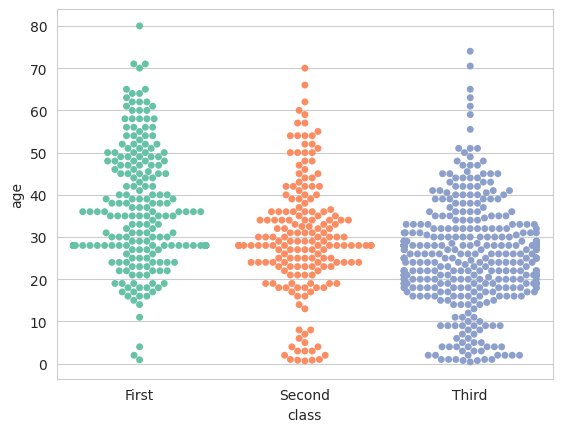

In [32]:
# Stategy: when missing, set the 'age' to the median value
titanicCopy = titanic.copy()
medianAge = titanicCopy['age'].median()
titanicCopy.fillna({'age': medianAge}, inplace=True)
sns.swarmplot(x="class", y="age", data=titanicCopy, palette='Set2');

**Example 7**

Visualize as heatmap the pairwise correlation of columns in dataset:
* set title 'titanic.corr()'
* set color map to 'inferno'

Possible color map values: `Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r`

<ipython-input-33-0fd1d3fef9da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(), annot=True, cmap='ocean')


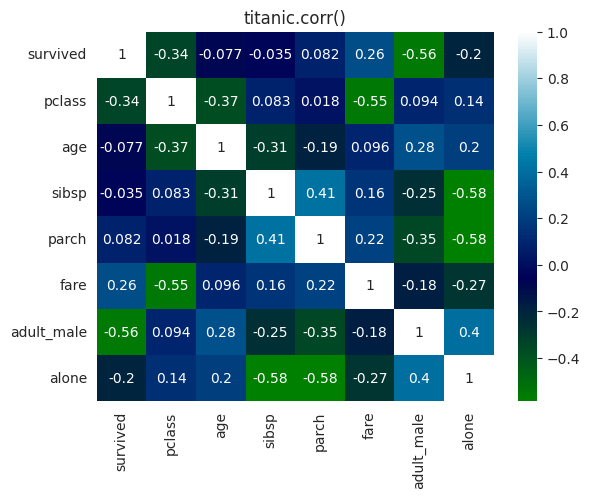

In [33]:
sns.heatmap(titanic.corr(), annot=True, cmap='ocean')
plt.title('titanic.corr()');

**Example 8**

Multi-plot grid for plotting, using histogram, conditional relationships between:
* 'sex' and 'age'
* 'sex' and 'fare'
* 'class' and 'age'
* 'class' and 'fare'

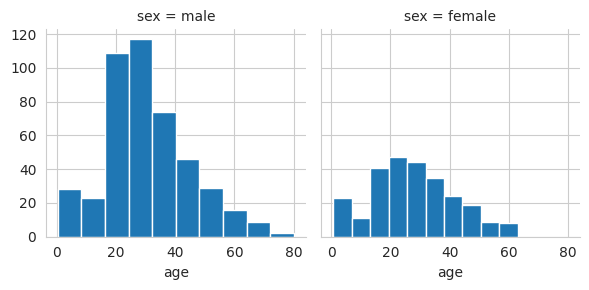

In [34]:
g = sns.FacetGrid(titanic, col='sex')
g = g.map(plt.hist, 'age')

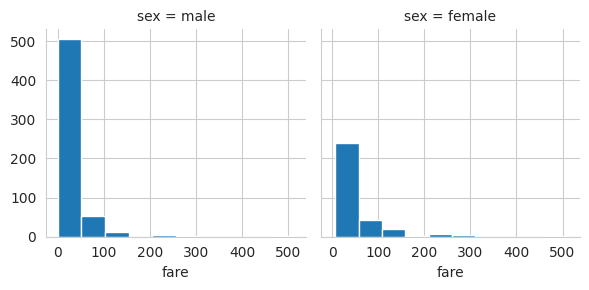

In [35]:
g = sns.FacetGrid(titanic, col='sex')
g = g.map(plt.hist, 'fare')

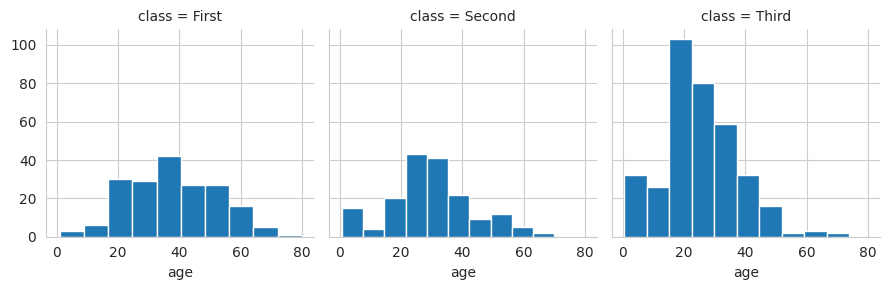

In [36]:
g = sns.FacetGrid(titanic, col='class')
g = g.map(plt.hist, 'age')

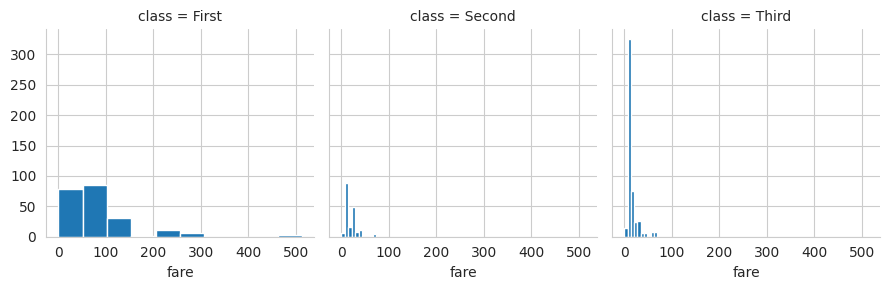

In [37]:
g = sns.FacetGrid(titanic, col='class')
g = g.map(plt.hist, 'fare')

**Example 9**

A multiline chart of timed events

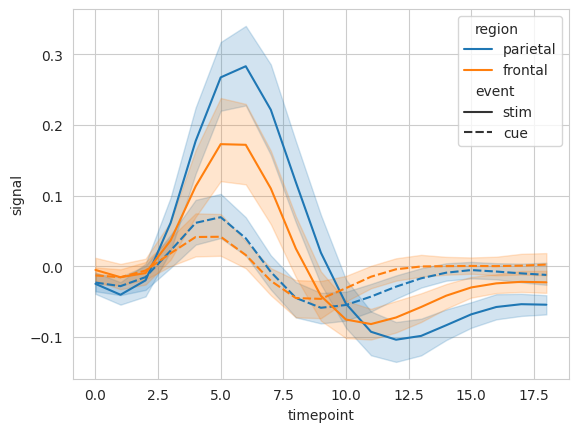

In [38]:
# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri);